In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
df = pd.read_csv('pokemon.csv')

In [10]:
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [11]:
feat = df._get_numeric_data()

In [13]:
feat.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,4,80,100,123,122,120,80,1,False
4,5,39,52,43,60,50,65,1,False


In [14]:
feat = feat.drop('#', axis=1)

In [15]:
feat.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,False
1,60,62,63,80,80,60,1,False
2,80,82,83,100,100,80,1,False
3,80,100,123,122,120,80,1,False
4,39,52,43,60,50,65,1,False


In [16]:
feat['Legendary'] = feat['Legendary'].astype(int)

In [17]:
feat.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,0
1,60,62,63,80,80,60,1,0
2,80,82,83,100,100,80,1,0
3,80,100,123,122,120,80,1,0
4,39,52,43,60,50,65,1,0


In [30]:
kmean = KMeans(n_clusters=8,random_state=402)

In [31]:
kmean.fit(feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=402, tol=0.0001, verbose=0)

In [32]:
cluster = kmean.predict(feat)

In [33]:
feat2 = feat.copy()
feat2['cluster'] = cluster

In [34]:
feat2.groupby(by='cluster').mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
cluster,,,,,,,,
0,58.219355,69.703226,69.554839,53.374194,56.638710,47.141935,3.490323,0.000000
1,80.780000,118.550000,91.240000,63.140000,78.220000,80.970000,3.340000,0.050000
2,67.634921,76.404762,62.896825,87.373016,71.952381,100.126984,3.166667,0.015873
3,89.867647,129.588235,92.308824,135.102941,95.955882,99.117647,3.485294,0.588235
4,46.994118,45.647059,42.017647,47.129412,46.835294,53.164706,3.129412,0.000000
5,115.333333,80.122807,69.842105,82.070175,78.385965,51.736842,3.333333,0.000000
6,62.933333,85.622222,146.333333,61.622222,95.911111,40.911111,3.444444,0.088889
7,79.455696,74.974684,91.873418,101.392405,108.658228,76.379747,3.430380,0.177215


In [35]:
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

py.sign_in('username','token')

In [85]:
def get_trace_list(dat,axisList,clusterInterestList):
    dat = dat[axisList]
    datList = []
    for c in clusterInterestList:
        datList.append(dat[dat['cluster']==c])

    traceList = []
    colorList = ['rgba(217, 117, 57)','rgba(117, 117, 117)','rgba(17, 67, 217)','rgba(217, 67, 217)','rgba(57, 67, 207)','rgba(47, 17, 207)'\
                ,'rgba(157, 167, 207)','rgba(147, 117, 207)']
    for i in range(len(datList)):
        dat = datList[i]
        colo = colorList[i]
        x = (dat.iloc[:,1]*100).astype('int')
        y = (dat.iloc[:,2]*100).astype('int')
        z = (dat.iloc[:,3]*100).astype('int')
        trace = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode='markers',
            marker=dict(
                size=5,
                line=dict(
                    color=colo,
                    #width=0.1
                ),
                opacity=0.5
            )
        )
        traceList.append(trace)
    return traceList

In [42]:
axisList = ['cluster','HP','Attack','Defense']

clusterInterestList = [0,5,3,6]
traceList = get_trace_list(feat2,axisList,clusterInterestList)
layout = go.Layout(
    scene=go.Scene(
        xaxis=go.XAxis(title=axisList[1]),
        yaxis=go.YAxis(title=axisList[2]),
        zaxis=go.ZAxis(title=axisList[3])
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traceList, layout=layout)
py.iplot(fig)

In [43]:
feat_norm = feat.copy()

In [45]:
feat_norm.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,0
1,60,62,63,80,80,60,1,0
2,80,82,83,100,100,80,1,0
3,80,100,123,122,120,80,1,0
4,39,52,43,60,50,65,1,0


In [46]:
feat_norm.columns

Index(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary'],
      dtype='object')

In [50]:
# col_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for col in feat_norm.columns:
    feat_norm[col] = (feat[col] - feat[col].mean()) / feat[col].std()

In [51]:
feat_norm.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,-0.297195
1,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,-0.297195
2,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,-0.297195
3,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,-0.297195
4,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,-0.297195


In [52]:
feat_norm.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-5.410949e-16,2.553513e-17,5.828671e-18,2.295386e-16,-2.584044e-16,-1.208669e-16,2.837175e-15,-1.054712e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.673179e+00,-2.279952e+00,-2.207658e+00,-1.919792e+00,-1.865056e+00,-2.177442e+00,-1.398762e+00,-2.971949e-01
25%,-7.542197e-01,-7.394701e-01,-7.645870e-01,-7.050239e-01,-7.870411e-01,-8.010021e-01,-7.968204e-01,-2.971949e-01
50%,-1.667831e-01,-1.232771e-01,-1.232222e-01,-2.389808e-01,-6.836414e-02,-1.127821e-01,-1.948786e-01,-2.971949e-01
75%,4.206536e-01,6.469641e-01,5.181426e-01,6.778253e-01,6.503128e-01,7.474930e-01,1.009005e+00,-2.971949e-01
max,7.274081e+00,3.419832e+00,5.007696e+00,3.703286e+00,5.681051e+00,3.844483e+00,1.610947e+00,3.360589e+00


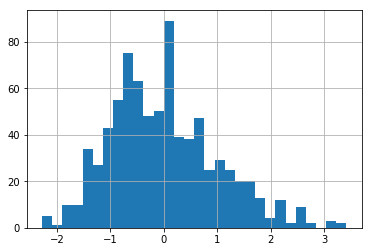

In [64]:
feat_norm['Attack'].hist(bins=30)

In [66]:
kmean2 = KMeans(n_clusters=8,random_state=402)

In [67]:
kmean2.fit(feat_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=402, tol=0.0001, verbose=0)

In [68]:
cluster2 = kmean2.predict(feat_norm)

In [69]:
feat2_norm = feat_norm.copy()
feat2_norm['cluster'] = cluster2

In [70]:
feat2_norm.groupby(by='cluster').mean()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
cluster,,,,,,,,
0,0.026399,0.156999,-0.037308,0.121812,0.225543,0.524335,-1.025918,-0.297195
1,-0.828779,-0.824789,-0.766437,-0.774960,-0.895534,-0.660932,-0.804538,-0.297195
2,0.919523,1.160774,0.827971,1.508593,1.223043,1.097956,0.268153,3.360589
3,0.347096,0.889691,0.013974,0.243870,-0.119296,0.757667,0.705417,-0.297195
4,0.087773,0.533995,1.701995,-0.147664,0.634913,-0.743241,0.005769,-0.297195
5,2.152909,-0.177731,-0.144850,0.064489,0.392926,-0.609741,-0.068891,-0.297195
6,-0.592848,-0.660152,-0.588780,-0.679178,-0.670065,-0.566470,1.017543,-0.297195
7,0.156623,-0.230117,0.248666,1.352614,1.096008,0.691436,0.377937,-0.297195


In [73]:
axisList = ['cluster','HP','Attack','Defense']

clusterInterestList = [5,2,4]
traceList = get_trace_list(feat2_norm,axisList,clusterInterestList)
layout = go.Layout(
    scene=go.Scene(
        xaxis=go.XAxis(title=axisList[1]),
        yaxis=go.YAxis(title=axisList[2]),
        zaxis=go.ZAxis(title=axisList[3])
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traceList, layout=layout)
py.iplot(fig)

In [75]:
pca = PCA(n_components=3, random_state=402)

In [76]:
pca.fit(feat_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=402,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
feat_pca = pca.transform(feat_norm)

In [78]:
feat_pca.shape

(800, 3)

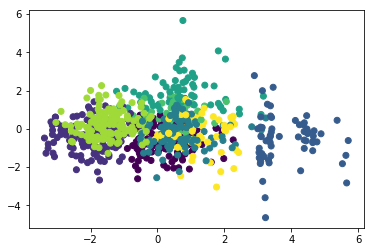

In [80]:
x = feat_pca[:, 0]
y = feat_pca[:, 1]

plt.scatter(x,y, c=cluster2)

In [81]:
feat2_norm_pca = feat2_norm.copy()

In [82]:
feat2_norm_pca['comp1'] = feat_pca[:, 0]
feat2_norm_pca['comp2'] = feat_pca[:, 1]
feat2_norm_pca['comp3'] = feat_pca[:, 2]

In [83]:
feat2_norm_pca.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster,comp1,comp2,comp3
0,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,-1.398762,-0.297195,1,-1.614725,-0.502548,1.196756
1,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,-1.398762,-0.297195,0,-0.511959,-0.455378,1.332871
2,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,-1.398762,-0.297195,0,1.005516,-0.363642,1.525522
3,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,-1.398762,-0.297195,7,2.237467,0.414124,1.937861
4,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,-1.398762,-0.297195,1,-1.792652,-1.157283,1.012567


In [87]:
axisList = ['cluster','comp1','comp2','comp3']

clusterInterestList = [0,1,3,5,2,4,6,7]
traceList = get_trace_list(feat2_norm_pca,axisList,clusterInterestList)
layout = go.Layout(
    scene=go.Scene(
        xaxis=go.XAxis(title=axisList[1]),
        yaxis=go.YAxis(title=axisList[2]),
        zaxis=go.ZAxis(title=axisList[3])
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traceList, layout=layout)
py.iplot(fig)

In [88]:
axisList = ['cluster','HP','Attack','Defense']

clusterInterestList = [0,1,3,5,2,4,6,7]
traceList = get_trace_list(feat2_norm,axisList,clusterInterestList)
layout = go.Layout(
    scene=go.Scene(
        xaxis=go.XAxis(title=axisList[1]),
        yaxis=go.YAxis(title=axisList[2]),
        zaxis=go.ZAxis(title=axisList[3])
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traceList, layout=layout)
py.iplot(fig)

In [91]:
score_list = []
n_list = []
for n in range(30)[2:]:
    model = KMeans(n_clusters=n, random_state=402)
    model.fit(feat)
    score = model.inertia_
    
    n_list.append(n)
    score_list.append(score)

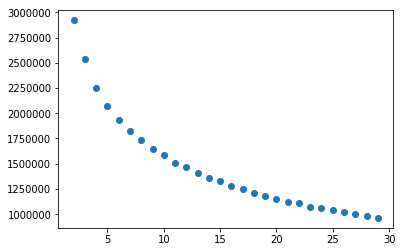

In [92]:
plt.scatter(n_list, score_list)